In [173]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [174]:
df = pd.read_csv("reduced_health_Survey_GW.csv")

## Data cleaning

In [175]:
# Rename diseases 
df.rename(columns = {
    "heal26": "diabetes",
    "heal27a": "hi_BP",
    "heal27b": "hi_chol",
    "heal27c": "lung_prob",
    "heal27d": "ment_health",
    "heal27e": "heart_disease",
    "heal27f": "cancer"
}, inplace = True)
df["healask"].replace({"Black non-hispanic": "Black non-Hispanic",
                     "White non-hispanic": "White non-Hispanic"}, inplace = True)

In [176]:
# BMI missing value = 99
df["bmi"].replace(99.9, np.NaN, inplace = True)
# Yes/no obese
conditions = [(df["bmi"]) >= 30, (df["bmi"] < 30)]
df["obese"] = np.select(conditions, [1,0])

In [177]:
# Multimorbidity
df[["diabetes", "hi_BP", "hi_chol", "lung_prob", "heart_disease",
    "cancer", "obese"]] = df[["diabetes", "hi_BP", "hi_chol", "lung_prob", "heart_disease",
                            "cancer", "obese"]].replace({"No": 0, "Yes": 1, "Refused": 0,
                              "Don't know": 0})
df["multimorbid"] = df[["diabetes", "hi_BP", "hi_chol",
           "lung_prob", "heart_disease", "cancer", "obese"]].sum(axis = 1)

In [178]:
# Race ns
race = df["healask"].value_counts().to_frame()
races = ["Hispanic", "Black non-Hispanic", "White non-Hispanic"]

In [179]:
# Time it takes to talk to park
df["walk_park"] = df["heal10min"].fillna(0) + 60*df["heal10hr"].fillna(0)

In [180]:
# Fruit/veg cost prohibitive
df["heal13"].replace({"Don't know": np.nan, "Refused": np.nan}, inplace = True)

# Fruit/veg daily servings
df["heal12"].replace({"None": 0}, inplace = True)
df["heal12_num"] = pd.to_numeric(df["heal12"])
df["heal12_num"] = df.apply(lambda x: x["heal12_num"] if x["heal12_num"] < 14 
                          else np.nan, axis = 1)

## Plots

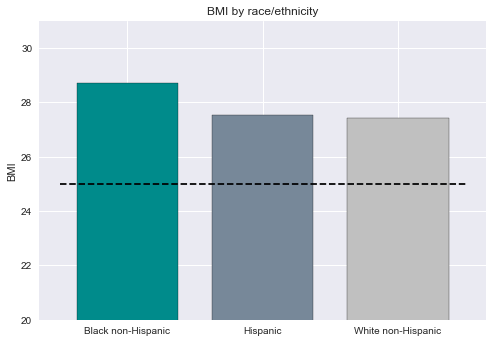

In [181]:
# BMI by race
bmi_race = df["bmi"].groupby(df["healask"]).mean().to_frame().reset_index()

colors = ["darkcyan", "lightslategray", "silver"]

fig, ax = plt.subplots()
plt.bar(range(3), bmi_race["bmi"], width = .75,
       edgecolor = "black", color = colors)
plt.ylim(20, 31)
plt.ylabel("BMI")
plt.title("BMI by race/ethnicity")
ax.plot([-.5,2.5], [25,25], "k--")
plt.xticks(np.arange(3), bmi_race["healask"].unique())
plt.show()

In [182]:
# Percent with each chronic disease - data
disease = df[["healask","diabetes", "hi_BP", "hi_chol",
           "lung_prob", "heart_disease", "cancer", "obese"]]
disease.replace({"No": 0, "Yes": 1, "Refused": 0,
               "Don't know": 0}, inplace = True)

# Add column of ns of each race
disease_race = disease.groupby(disease["healask"]).sum()
disease_race = disease_race.merge(race,left_index=True,
                               right_index=True)
disease_race.rename(columns = {"healask": "n"}, inplace = True)

# Create df with percentages having each disease
disease_race_per = disease_race[["diabetes", "hi_BP", "hi_chol",
           "lung_prob", "heart_disease", "obese"]].div(disease_race.n, axis = 0)
disease_race_per = round(disease_race_per*100,2)
disease_race_per = disease_race_per.transpose().reset_index()
disease_race_per

disease_race_per

C:\Users\Cynthia\Anaconda3\lib\site-packages\pandas\core\generic.py:3725: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  limit=limit, regex=regex)


,index,Black non-Hispanic,Hispanic,White non-Hispanic
0,diabetes,24.13,10.33,20.00
1,hi_BP,44.76,23.33,39.23
2,hi_chol,26.22,23.67,35.00
3,lung_prob,17.48,13.67,14.23
4,heart_disease,8.39,8.33,10.77
5,obese,31.82,21.00,23.46


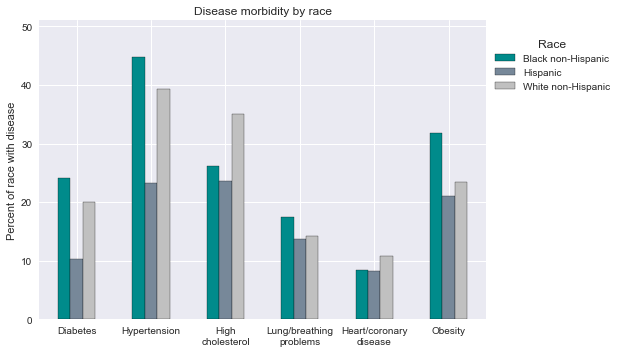

In [183]:
# Percent with each chronic disease - plot
diseases = ["Diabetes", "Hypertension", "High\ncholesterol",
           "Lung/breathing\nproblems", "Heart/coronary\ndisease", "Obesity"]
ax = disease_race_per.plot(kind = "bar", color = colors, 
                         ylim = [0,51], edgecolor = "black")
plt.ylabel("Percent of race with disease")
plt.xticks(np.arange(6), diseases, rotation = 0)
ax.legend(loc='center left', bbox_to_anchor=(1,.85),
         title = "Race")
plt.title("Disease morbidity by race")
plt.show()

In [184]:
disease_race_per

,index,Black non-Hispanic,Hispanic,White non-Hispanic
0,diabetes,24.13,10.33,20.00
1,hi_BP,44.76,23.33,39.23
2,hi_chol,26.22,23.67,35.00
3,lung_prob,17.48,13.67,14.23
4,heart_disease,8.39,8.33,10.77
5,obese,31.82,21.00,23.46


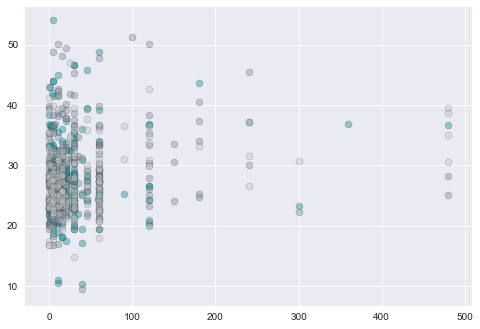

In [185]:
# Time takes to walk to park
walk_bmi_df = df[["healask", "walk_park", "bmi"]]

for i, race in enumerate(races):
    walk_bmi_race_df = walk_bmi_df[walk_bmi_df["healask"] == race]
    plt.scatter(walk_bmi_race_df["walk_park"], walk_bmi_race_df["bmi"],
               color = colors[i], label = race, alpha = .4, edgecolor = "black")
plt.show()

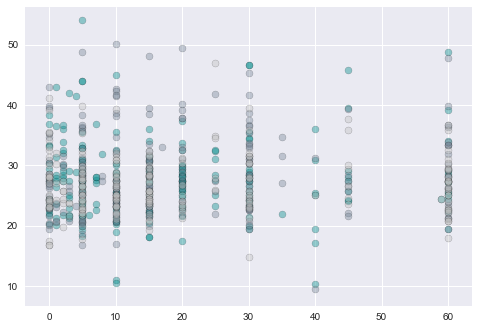

In [186]:
# Replot walking below, remove outliers >90% walking
walk_bmi_df_90 = walk_bmi_df[walk_bmi_df["walk_park"]<=60]

for i, race in enumerate(races):
    walk_bmi_race_df_90 = walk_bmi_df_90[walk_bmi_df_90["healask"] == race]
    plt.scatter(walk_bmi_race_df_90["walk_park"], walk_bmi_race_df_90["bmi"],
               color = colors[i], label = race, alpha = .4, edgecolor = "black")
plt.show()

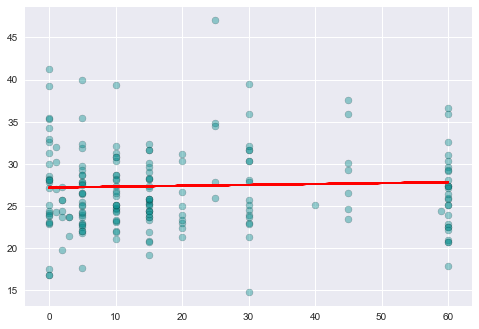

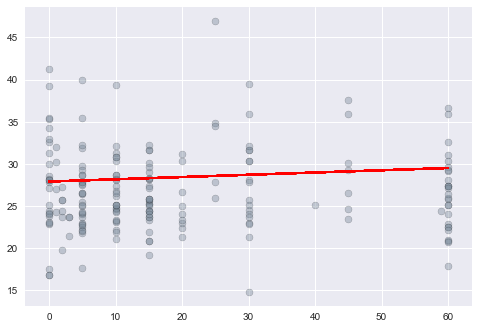

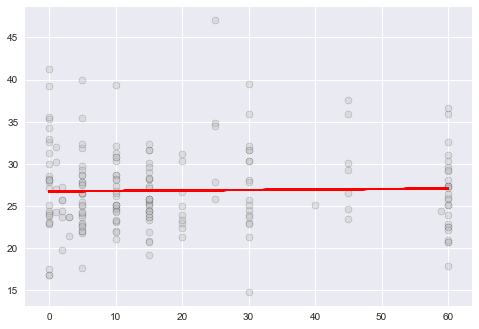

In [187]:
# Replot walking below, remove outliers >90% walking, add regression line

walk_bmi_df_90 = walk_bmi_df[(walk_bmi_df["walk_park"]<=60) &
                           (walk_bmi_df["bmi"]>0)]

for i, race in enumerate(races):
    x = np.array(walk_bmi_df_90["walk_park"][walk_bmi_df_90["healask"] == race])
    y = walk_bmi_df_90["bmi"][walk_bmi_df_90["healask"] == race]
    fig, ax = plt.subplots()
    fit = np.polyfit(x,y, deg = 1)
    ax.plot(x,fit[0]*x + fit[1], color = "red")
    plt.scatter(walk_bmi_race_df_90["walk_park"], walk_bmi_race_df_90["bmi"],
               color = colors[i], label = race, alpha = .4, edgecolor = "black")
plt.show()

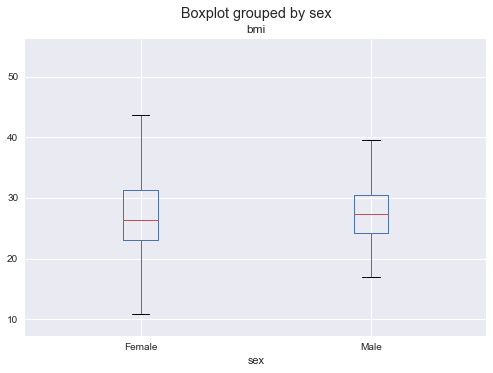

In [188]:
# BMI by gender
bmi_gender_df = df[["bmi", "sex", "healask"]]
bmi_gender_df.boxplot(column = "bmi", by = "sex")
plt.show()

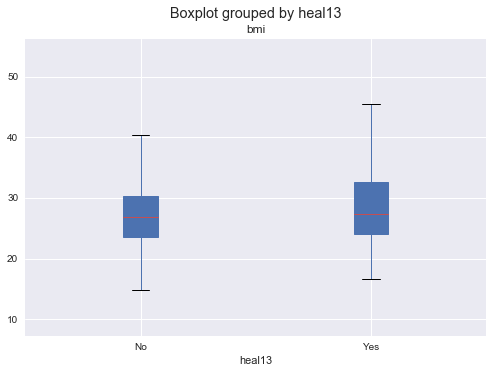

In [189]:
# BMI by access to fruit/veg
plt.clf()
bmi_fruit_df = df[["bmi", "heal13", "healask"]]
bmi_fruit_df.boxplot(column = "bmi", by = "heal13", patch_artist = True)
plt.show()

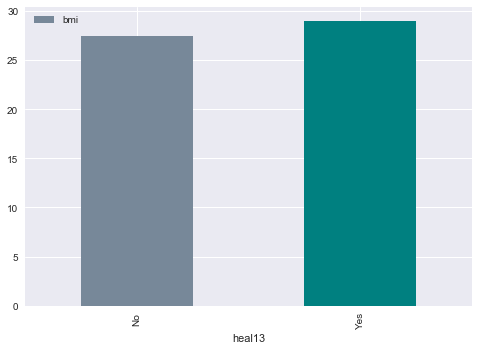

In [190]:
# BMI by access to fruit/veg
bmi_fruit_df = df[["bmi", "heal13", "healask"]][(df["heal13"] == "No") | (df["heal13"] == "Yes")]
bmi_fruit_df = bmi_fruit_df.groupby(bmi_fruit_df["heal13"]).mean()
plt.clf()
bmi_fruit_df.plot(kind = "bar", color = ["lightslategray", "teal"])
plt.show()

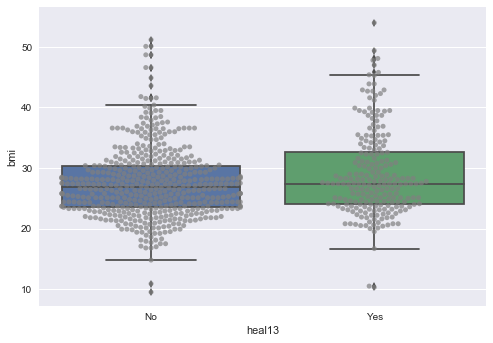

In [191]:
# BMI by access to fruit/veg
ax = sns.swarmplot(x = "heal13", y = "bmi", data = df, color = "gray", edgecolor = "black", alpha = .7)
ax = sns.boxplot(x = "heal13", y = "bmi", data = df)
plt.show()

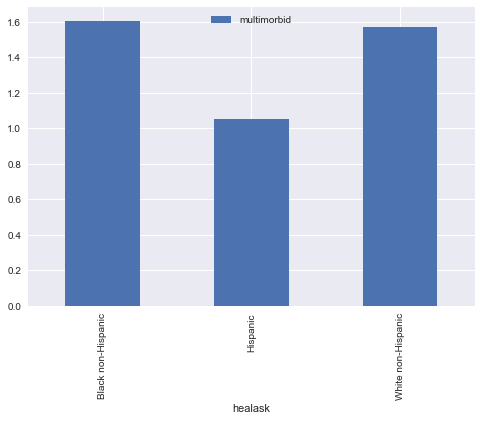

In [192]:
# Multimorbidity by race
multidisease = df[["healask", "bmi", "multimorbid"]]
multidisease_race = multidisease.groupby("healask").mean()
multidisease_race = multidisease_race["multimorbid"].to_frame()
plt.clf()
multidisease_race.plot(kind = "bar")
plt.show()

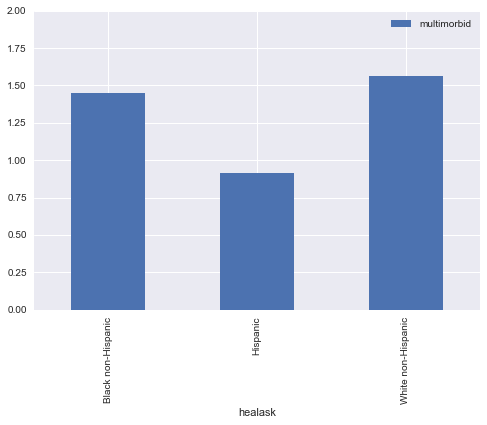

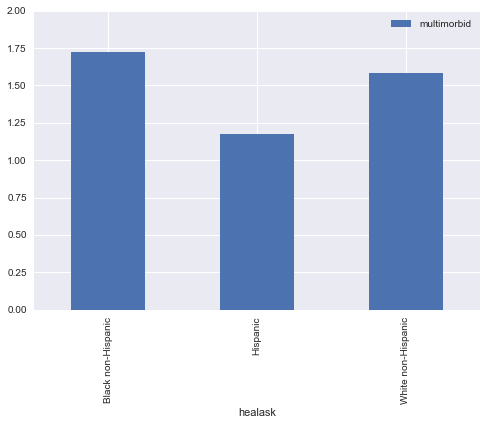

In [228]:
# Multimorbidity by race & gender
multidisease = df[["healask", "bmi", "multimorbid", "sex"]]
plt.clf()
for sex in multidisease["sex"].unique():
    multidisease_gend = multidisease[multidisease["sex"] == sex]
    multidisease_gend = multidisease_gend.groupby("healask").mean()
    multidisease_gend = multidisease_gend["multimorbid"].to_frame()
    multidisease_gend.plot(kind = "bar")
    plt.ylim(0,2)
plt.show()
# multidisease_gend

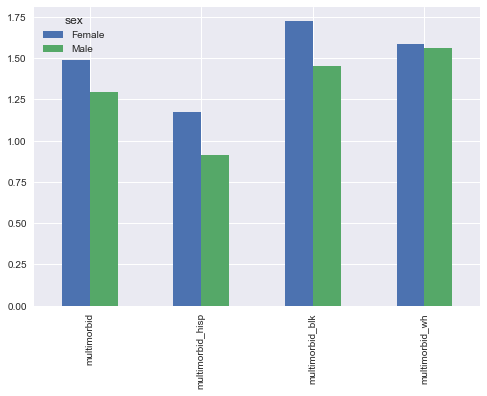

,multimorbid,multimorbid_hisp,multimorbid_blk,multimorbid_wh
sex,,,,
Female,1.491228,1.176101,1.725000,1.583942
Male,1.292308,0.914894,1.452381,1.560976


In [263]:
# Multimorbidity by race, gender
multi_race_gender = df[["multimorbid", "healask", "sex"]]
multi_race_gender_output = df[["multimorbid", "healask", "sex"]].groupby("sex").mean()
df_label = ["hisp", "blk", "wh"]
for i, race in enumerate(races):
    multi_race_gender = df[["multimorbid", "healask", "sex"]][df["healask"] == race].groupby("sex").mean()
    multi_race_gender_output["multimorbid_"+df_label[i]]=multi_race_gender["multimorbid"]
multi_race_gender_output.transpose().plot(kind = "bar")
plt.show()
multi_race_gender_output.head()

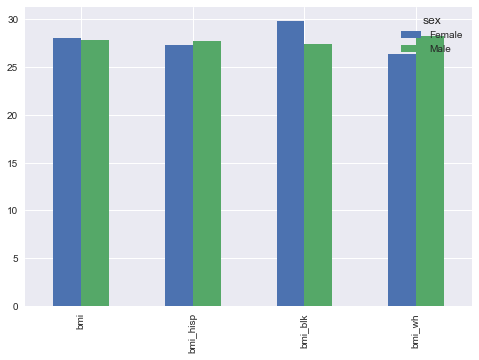

In [271]:
# Multimobidity by race, gender
bmi_race_gender_output = df[["bmi", "healask", "sex"]].groupby("sex").mean()
df_label = ["hisp", "blk", "wh"]
plt.clf()
for i, race in enumerate(races):
    bmi_race_gender = df[["bmi", "healask", "sex"]][df["healask"] == race].groupby("sex").mean()
    bmi_race_gender_output["bmi_"+df_label[i]]=bmi_race_gender["bmi"]
bmi_race_gender_output.transpose().plot(kind = "bar")
plt.show()

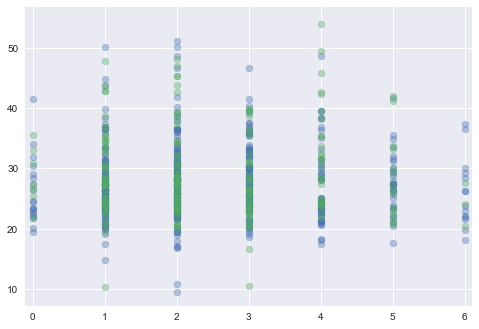

In [193]:
# BMI by servings
plt.clf()

for i, access in enumerate(["No", "Yes"]):
    bmi_serve = df[["bmi", "heal12_num"]][df["heal13"] == access]
    plt.scatter(bmi_serve["heal12_num"], bmi_serve["bmi"], alpha = .4)
    plt.xlim(-.1,6.1)
    
plt.show()

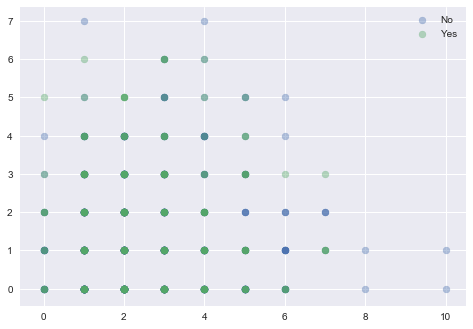

In [194]:
# Multimorbidity by servings
plt.clf()

for i, access in enumerate(["No", "Yes"]):
    multi_serve = df[["multimorbid", "heal12_num"]][df["heal13"] == access]
    plt.scatter(multi_serve["heal12_num"], multi_serve["multimorbid"], alpha = .4, label = access)
    plt.legend()
    
plt.show()

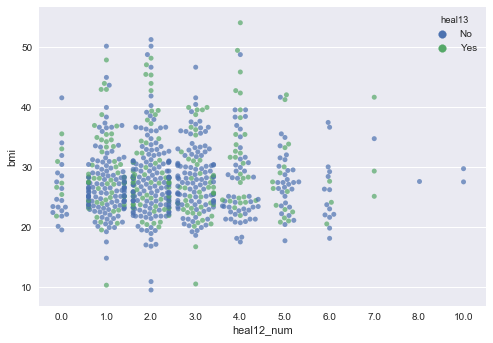

In [195]:
# BMI by servings
plt.clf()
sns.swarmplot("heal12_num", "bmi", hue = "heal13", data = df, alpha = .7)
plt.show()

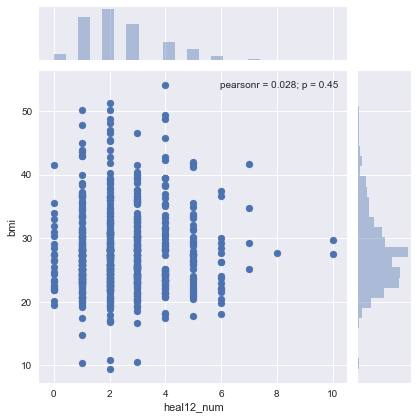

In [196]:
# BMI by servings
plt.clf()
sns.jointplot("heal12_num", "bmi", data = df)
plt.show()

In [197]:
# Access to fruit/veg by race
race_fruit = df[["healask", "heal13"]]
race_fruit = race_fruit.replace(["No", "Yes"], [0,1]).groupby("healask").sum()
race_fruit = race_fruit.merge(race, left_index=True, right_index=True)
race_fruit["Percent"] = round(100*race_fruit["heal13"]/race_fruit["healask"],2)
race_fruit = race_fruit["Percent"]
race_fruit.plot(kind = "bar")
plt.show()

ValueError: can not merge DataFrame with instance of type <class 'str'>

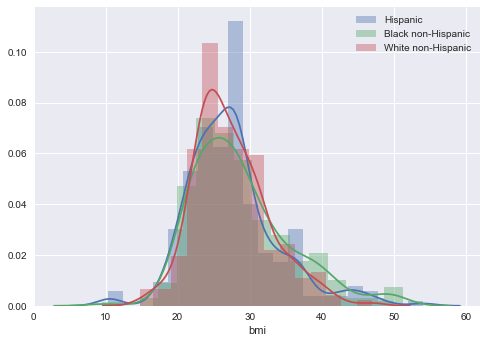

In [198]:
# Bmi distribution
for race in races:
    bmi_race = df["bmi"][(df["healask"] == race) & (df["bmi"] > 0)]
    sns.distplot(bmi_race, label = race)
    plt.legend()
plt.show()

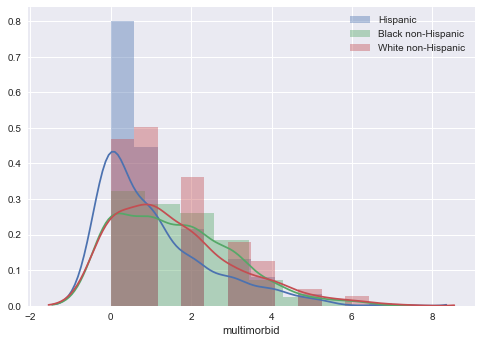

In [199]:
# Multimorbidity distribution by race
for race in races:
    mult_race = df["multimorbid"][(df["healask"] == race)]
    sns.distplot(mult_race, label = race)
    plt.legend()
plt.show()

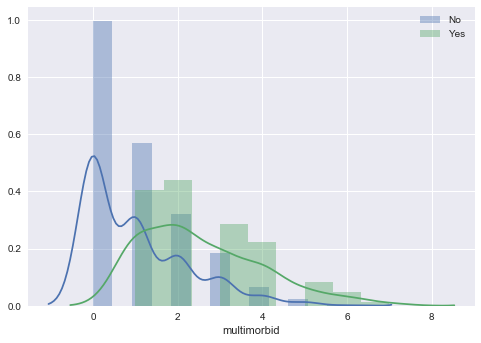

In [200]:
# Multimorbidity distribution by obese
obeseYN = ["No", "Yes"]
for obese in [0,1]:
    mult_obese = df["multimorbid"][df["obese"] == obese]
    sns.distplot(mult_obese, label = obeseYN[obese])
    plt.legend()
plt.show()

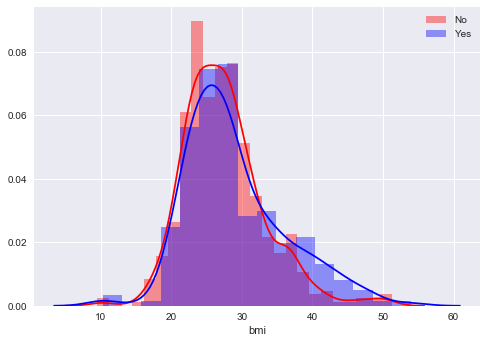

In [283]:
# BMI distribution by access
accessYN = ["No", "Yes"]
colors_bmi = ["red", "blue"]
for i, access in enumerate(accessYN):
    bmi_access = df["bmi"][(df["heal13"] == access) &
                         (df["bmi"] > 0)]
    sns.distplot(bmi_access, label = access,
                color = colors_bmi[i])
    plt.legend()
plt.show()

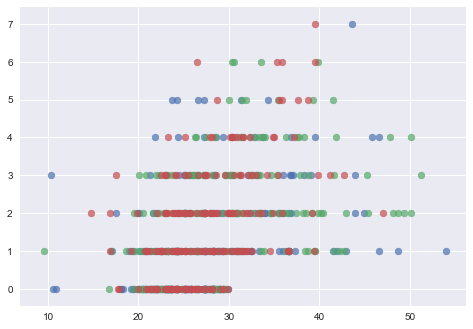

In [202]:
# Multimorbidity by BMI
plt.clf()
for race in races:
    df_race = df[df["healask"] == race]
    plt.scatter("bmi", "multimorbid", data = df_race, alpha = .7)
plt.show()

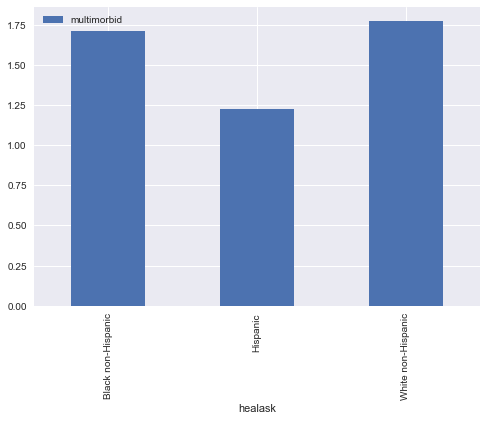

In [203]:
# Multimorbidity by race - doctors only
multidisease_12 = df[["healask", "bmi", "multimorbid"]][df["heal17"] == "Within the past year (anytime less than 12 months ago)"]
multidisease_race_12 = multidisease_12.groupby("healask").mean()
multidisease_race_12 = multidisease_race_12["multimorbid"].to_frame()
plt.clf()
multidisease_race_12.plot(kind = "bar")
plt.show()